In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df_flight = pd.read_csv("2006.csv")

In [15]:
df_flight.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,TaxiIn,TaxiOut,Cancelled
0,2006,1,11,3,745,1018,343,1587,45,13,0
1,2006,1,11,3,1053,1318,613,1587,27,19,0
2,2006,1,11,3,1915,2133,617,1587,4,11,0
3,2006,1,11,3,1755,1933,300,872,16,10,0
4,2006,1,11,3,832,1015,765,872,27,12,0


In [4]:
# Filter out unimportant columns

df_flight = df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled']]

In [5]:
# How much of your data is missing?
df_flight.isnull().sum().sort_values(ascending=False).head()

Cancelled    0
TaxiOut      0
TaxiIn       0
Distance     0
FlightNum    0
dtype: int64

In [6]:
# Change the dtypes (int64 -> int32)

df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum', 
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled']] = df_flight[['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum', 
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled']].astype('int32')

C:\Users\itiag\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [7]:
df_flight.dtypes

Year          int32
Month         int32
DayofMonth    int32
DayOfWeek     int32
CRSDepTime    int32
CRSArrTime    int32
FlightNum     int32
Distance      int32
TaxiIn        int32
TaxiOut       int32
Cancelled     int32
dtype: object

In [8]:
from sklearn.preprocessing import StandardScaler

features = ['Year','Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum', 
 'Distance',
 'TaxiIn',
 'TaxiOut']

x = df_flight.loc[:, features].values

y = df_flight.loc[:, ['Cancelled']].values

x = StandardScaler().fit_transform(x)

In [9]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [10]:
targetDataframe = df_flight[['Cancelled']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [11]:
newDataframe.head(5)

,PC1,PC2,Cancelled
0,-1.382859,1.715197,0
1,-0.453095,1.640261,0
2,1.928974,1.161220,0
3,1.312923,0.439044,0
4,-1.402805,0.681491,0


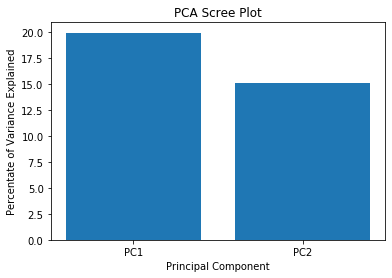

In [12]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
plt.bar(x= range(1,3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

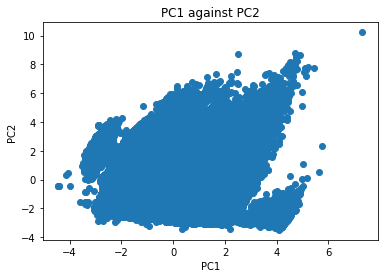

In [13]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

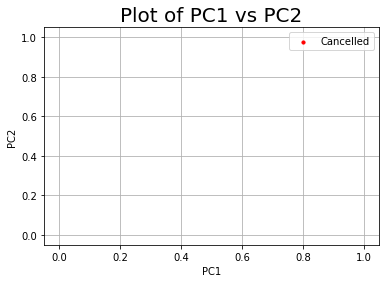

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Cancelled']

colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['Cancelled'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10)
    
ax.legend(targets)
ax.grid()